This classifier is based on the use of the top 5 features targeting the most common requests.

In [1]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
import operator

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# To calculate the accuracy score of the model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("311TrimmedGrouped.csv")
df.fillna(0, inplace=True) #fill zero instances of weather
# df = df.reset_index()
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed,REQUEST_GROUP
0,205276,2017-12-31T13:42:00,Potholes,Website,1,DPW - Street Maintenance,Beechview,4.0,19.0,42003192000,...,1514721600,1514696400,1,1514732400,9.10,261,5.37,1514696400,0.56,Roads
1,205180,2017-12-29T17:45:00,Potholes,Website,1,DPW - Street Maintenance,Manchester,6.0,21.0,42003210700,...,1514541600,1514523600,1,1514559600,8.58,253,8.96,1514577600,1.31,Roads
2,205151,2017-12-29T14:58:00,Potholes,Call Center,1,DPW - Street Maintenance,Regent Square,9.0,14.0,42003141000,...,1514541600,1514523600,1,1514559600,8.28,252,8.98,1514577600,1.26,Roads
3,205130,2017-12-29T14:03:00,Potholes,Call Center,1,DPW - Street Maintenance,Brookline,4.0,19.0,42003191700,...,1514541600,1514523600,1,1514559600,8.59,253,9.22,1514577600,1.30,Roads
4,205098,2017-12-29T12:40:00,Potholes,Call Center,1,DPW - Street Maintenance,Lincoln Place,5.0,31.0,42003310200,...,1514541600,1514523600,1,1514559600,8.32,252,9.37,1514577600,1.29,Roads


In [3]:
df.columns

Index(['REQUEST_ID', 'CREATED_ON', 'REQUEST_TYPE', 'REQUEST_ORIGIN', 'STATUS',
       'DEPARTMENT', 'NEIGHBORHOOD', 'COUNCIL_DISTRICT', 'WARD', 'TRACT',
       'PUBLIC_WORKS_DIVISION', 'PLI_DIVISION', 'POLICE_ZONE', 'FIRE_ZONE',
       'X', 'Y', 'GEO_ACCURACY', 'current.apparentTemperature',
       'current.cloudCover', 'current.dewPoint', 'current.humidity',
       'current.icon', 'current.precipIntensity', 'current.precipProbability',
       'current.precipType', 'current.pressure', 'current.summary',
       'current.temperature', 'current.time', 'current.uvIndex',
       'current.visibility', 'current.windBearing', 'current.windGust',
       'current.windSpeed', 'daily.apparentTemperatureHigh',
       'daily.apparentTemperatureHighTime', 'daily.apparentTemperatureLow',
       'daily.apparentTemperatureLowTime', 'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMaxTime', 'daily.apparentTemperatureMin',
       'daily.apparentTemperatureMinTime', 'daily.cloudCover',
    

In [4]:
df.corr()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
REQUEST_ID,1.000000,0.010486,-0.041505,0.029464,0.012534,0.001780,0.029464,-0.015286,-0.040154,0.001893,...,0.232976,0.997759,0.997771,0.020121,0.997777,0.029375,-0.075120,-0.395048,0.997785,-0.407309
STATUS,0.010486,1.000000,0.005129,0.004965,0.008233,-0.025449,0.004965,-0.022022,0.003031,0.024175,...,-0.019003,0.012299,0.012262,-0.014554,0.012261,-0.006097,0.006358,0.009309,0.012293,0.007724
COUNCIL_DISTRICT,-0.041505,0.005129,1.000000,-0.610653,-0.383170,-0.252472,-0.610653,0.332147,0.780811,0.298943,...,-0.014441,-0.042063,-0.042095,-0.018534,-0.042107,-0.017932,0.015295,0.022818,-0.042138,0.025142
WARD,0.029464,0.004965,-0.610653,1.000000,0.444382,0.072012,1.000000,-0.138735,-0.500677,-0.381241,...,0.023906,0.029914,0.029998,0.055869,0.030016,0.026315,-0.017567,-0.018364,0.030069,-0.032200
TRACT,0.012534,0.008233,-0.383170,0.444382,1.000000,0.113109,0.444382,0.009178,-0.298280,-0.199405,...,0.004035,0.013886,0.013969,0.022993,0.013980,0.018206,-0.018241,-0.007101,0.014017,-0.009092
PUBLIC_WORKS_DIVISION,0.001780,-0.025449,-0.252472,0.072012,0.113109,1.000000,0.072012,0.378562,-0.400006,-0.598584,...,0.006943,0.002764,0.002765,0.023192,0.002776,0.006160,0.004018,-0.001536,0.002802,-0.002251
PLI_DIVISION,0.029464,0.004965,-0.610653,1.000000,0.444382,0.072012,1.000000,-0.138735,-0.500677,-0.381241,...,0.023906,0.029914,0.029998,0.055869,0.030016,0.026315,-0.017567,-0.018364,0.030069,-0.032200
POLICE_ZONE,-0.015286,-0.022022,0.332147,-0.138735,0.009178,0.378562,-0.138735,1.000000,0.222210,-0.209840,...,0.004851,-0.015536,-0.015512,0.024104,-0.015507,-0.000418,0.004428,0.008654,-0.015506,0.005043
X,-0.040154,0.003031,0.780811,-0.500677,-0.298280,-0.400006,-0.500677,0.222210,1.000000,0.188529,...,-0.018560,-0.040725,-0.040723,-0.022269,-0.040733,-0.017295,0.011077,0.020603,-0.040748,0.024145
Y,0.001893,0.024175,0.298943,-0.381241,-0.199405,-0.598584,-0.381241,-0.209840,0.188529,1.000000,...,0.007793,0.000554,0.000541,-0.027130,0.000526,-0.007676,0.001168,-0.007169,0.000508,-0.000404


In [5]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8689
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1539
City Source (CDBG)                      1499
Street Light - Repair                   1422
Vacant Building                         1256
Paving Request                          1236
Overgrowth                              1209
Snow/Ice removal                        1033
Pruning (city tree)                     1020
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              787
Request New Sign                         781
Illegal Dumping                          756
Leak                                     736
Traffic                                  726
Name: REQU

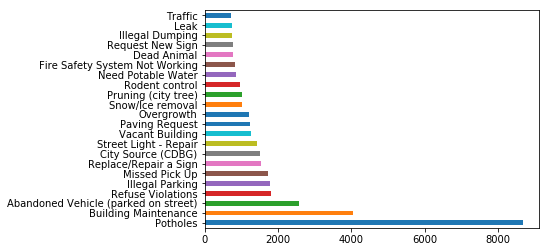

In [6]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).plot.barh()

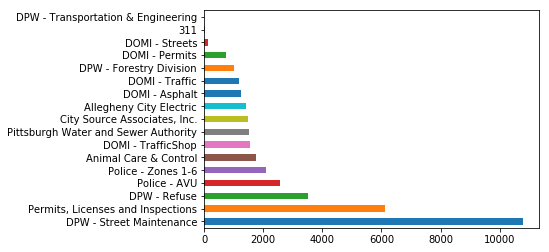

In [7]:
df['DEPARTMENT'].value_counts(sort=True, ascending=False, dropna=False).plot.barh()

In [8]:
df['NEIGHBORHOOD'].value_counts(sort=True, ascending=False, dropna=False)

Brookline                    1716
Carrick                      1600
South Side Slopes            1225
Squirrel Hill South          1129
Mount Washington             1034
South Side Flats             1022
Bloomfield                    950
Hazelwood                     930
Central Lawrenceville         885
Lincoln-Lemington-Belmar      872
Beechview                     857
East Liberty                  786
Homewood North                763
Greenfield                    738
Garfield                      735
Shadyside                     730
Stanton Heights               653
Homewood South                640
Knoxville                     623
Marshall-Shadeland            621
Central Business District     595
Brighton Heights              581
Sheraden                      580
Highland Park                 575
Perry North                   559
Overbrook                     549
Larimer                       543
Perry South                   520
Squirrel Hill North           511
Elliott       

In [9]:
df['REQUEST_ORIGIN'].value_counts(sort=True, ascending=False, dropna=False)

Call Center           24016
Website                5897
Control Panel          4600
Report2Gov iOS         1117
Twitter                 897
Report2Gov Android      360
Text Message            317
QAlert Mobile iOS         5
Report2Gov Website        4
Email                     2
Name: REQUEST_ORIGIN, dtype: int64

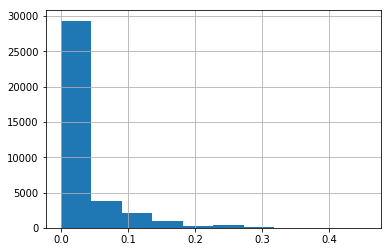

In [10]:
df['daily.precipIntensityMax'].hist(bins=10)

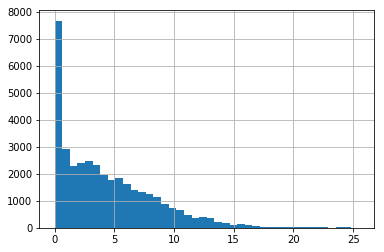

In [11]:
df['current.windGust'].hist(bins=40)

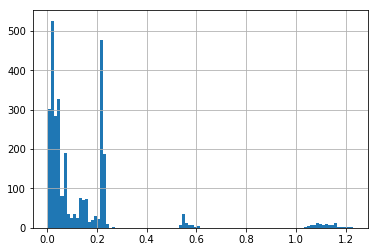

In [12]:
precip = df['daily.precipAccumulation']
precip = precip[precip > 0] #hide no precipitation days
precip.hist(bins=100)

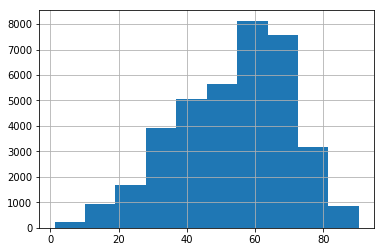

In [13]:
df['current.temperature'].hist()

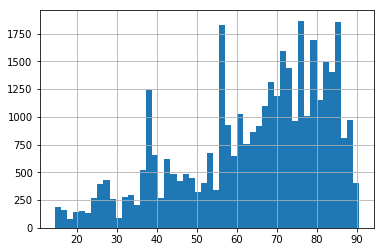

In [14]:
df['daily.temperatureHigh'].hist(bins=50)

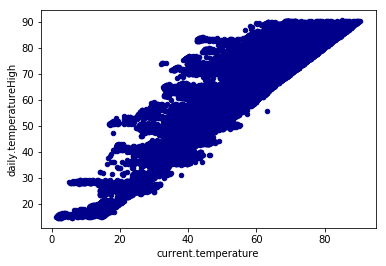

In [15]:
df.plot.scatter(x='current.temperature', y='daily.temperatureHigh', c='DarkBlue')

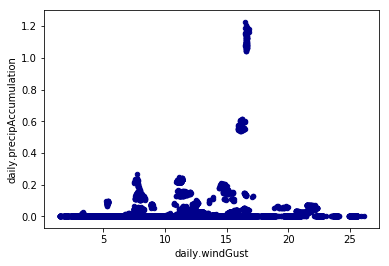

In [16]:
df.plot.scatter(x='daily.windGust', y='daily.precipAccumulation', c='DarkBlue')

# Classifier
Source: https://github.com/dbabichenko/python_for_data_and_analytics/tree/master/12%20-%20Classification

In [17]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [18]:
def classify(predictors, response, classifier = 'svm', kern='rbf', neighbors=3, kfolds=0, report=False, features_select=0):        
    # split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.20, random_state=1)

    
    if classifier == 'nb':
        cl = GaussianNB() # instantiate model
        msg = 'Naive Bayes'
    elif classifier == 'svm':
        cl = svm.SVC(kernel=kern) # instantiate model
        msg = 'SVM with ' + kern + ' kernel'
    elif classifier == 'knn':
        cl = KNeighborsRegressor(n_neighbors=neighbors)
        msg = 'KNN with k=' + str(neighbors)
    elif classifier == 'rf':
        # Instantiate model with  decision trees
        # Note that the number of decision trees is denoted
        # using the neighbors parameter, which is set to 3 by default
        cl = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        msg = 'Random Forest with ' + str(neighbors) + ' decision trees'
    elif classifier == 'dtree':
        cl = DecisionTreeClassifier(min_samples_split=20, random_state=99)
        msg = 'Decision tree'
    elif classifier == 'logisticregression':
        cl = LogisticRegression()
        msg = 'Logistic Regression'
        
    model = cl.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    print(msg + ' model accuracy score: ', metrics.accuracy_score(y_test, y_pred_class.round()))
    
    if kfolds > 0:
        # Perform k-fold cross validation
        scores = cross_val_score(model, predictors, response, cv=kfolds)
        print('Cross-validated score:', scores.mean())
    
    if report == True:
        print('Confusion matrix')
        print(metrics.confusion_matrix(y_test, y_pred_class)) # confusion matrix
        print('Classification report')
        target_names=['low','med','high']
        print(metrics.classification_report(y_test, y_pred_class, target_names=target_names))
        
        print('______________________________')
    
    if features_select > 0:
        test = SelectKBest(score_func=chi2, k=features_select)
        fit = test.fit(predictors, response)
        
        # summarize scores
        np.set_printoptions(precision=3)
        # print(fit.scores_)
        features_scores = {}
        for i in range(0, len(predictors.columns)):
            features_scores[predictors.columns[i]] = fit.scores_[i]
            
        # print(features_scores)
        sorted_features_scores = sorted(features_scores.items(), key=operator.itemgetter(1))
        print(sorted_features_scores[-5:])        

In [19]:
def decompose(predictors):
    # feature extraction
    pca = PCA(n_components=3)
    fit = pca.fit(predictors)
    
    # summarize components
    # print(fit.explained_variance_ratio_)
    # print(fit.components_)
    return pd.DataFrame(fit.components_)

# Feature Selection

In [20]:
# define X and y
X = df[['daily.precipIntensityMax', 'current.windGust', 'daily.precipAccumulation','current.temperature','daily.temperatureHigh',]]
label_encode(X, X.columns.values)

# y = df[['NEIGHBORHOOD']]
# y = df['DEPARTMENT']
y = df[['REQUEST_GROUP']]  

label_encode(y, y.columns.values)
# y = y['REQUEST_GROUP']

C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
X.corr()

,daily.precipIntensityMax,current.windGust,daily.precipAccumulation,current.temperature,daily.temperatureHigh
daily.precipIntensityMax,1.000000,0.019589,-0.092303,0.324229,0.230018
current.windGust,0.019589,1.000000,0.180457,-0.186243,-0.443524
daily.precipAccumulation,-0.092303,0.180457,1.000000,-0.299133,-0.358163
current.temperature,0.324229,-0.186243,-0.299133,1.000000,0.891066
daily.temperatureHigh,0.230018,-0.443524,-0.358163,0.891066,1.000000


# Classification Scores

In [22]:
classify(X, y.values.ravel(), classifier='logisticregression', kfolds=10, report=True, features_select=5)

C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression model accuracy score:  0.3944645976084912


C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Cross-validated score: 0.38190953851993364
Confusion matrix
[[   0    0    0    0  364    1    0]
 [   0    0    0    0  859   21    0]
 [   0    0    0    0  147    2    0]
 [   0    0    0    0 1608   36    0]
 [   0    0    0    0 2716   54    0]
 [   0    0    0    0  977  220    0]
 [   0    0    0    0  436    2    0]]
Classification report


ValueError: Number of classes, 7, does not match size of target_names, 3. Try specifying the labels parameter

In [23]:
classify(X, y, classifier='logisticregression', kfolds=10, report=True, features_select=5)

C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression model accuracy score:  0.3944645976084912


C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was p

Cross-validated score: 0.38190953851993364
Confusion matrix
[[   0    0    0    0  364    1    0]
 [   0    0    0    0  859   21    0]
 [   0    0    0    0  147    2    0]
 [   0    0    0    0 1608   36    0]
 [   0    0    0    0 2716   54    0]
 [   0    0    0    0  977  220    0]
 [   0    0    0    0  436    2    0]]
Classification report


ValueError: Number of classes, 7, does not match size of target_names, 3. Try specifying the labels parameter

In [24]:
classify(X, y, classifier='nb', kfolds=10, report=True, features_select=5)

C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Naive Bayes model accuracy score:  0.37471449684267094
Cross-validated score: 0.33406463076822124
Confusion matrix
[[   0    0    0    0  311   11   43]
 [   0    0    0    2  723   78   77]
 [   0    0    0    1  128    8   12]
 [   0    0    0    2 1305  134  203]
 [   0    0    0    3 2315  200  252]
 [   0    0    0    1  699  403   94]
 [   0    0    0    0  361    8   69]]
Classification report


C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Number of classes, 7, does not match size of target_names, 3. Try specifying the labels parameter

In [25]:
classify(X, y, classifier='dtree', kfolds=10, report=True, features_select=5)

Decision tree model accuracy score:  0.38076044605669757
Cross-validated score: 0.22965785838175087
Confusion matrix
[[  15   47    1   98  146   39   19]
 [  30  134    5  203  387   94   27]
 [   1   20   11   39   61   15    2]
 [  38  169    7  655  572  160   43]
 [  67  248   12  592 1557  228   66]
 [  23  109    4  240  361  429   31]
 [  16   46    1  135  168   39   33]]
Classification report


ValueError: Number of classes, 7, does not match size of target_names, 3. Try specifying the labels parameter

In [26]:
classify(X, y, classifier='rf', neighbors=1000, kfolds=5)

C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest with 1000 decision trees model accuracy score:  0.37229611715706035


C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Cross-validated score: -1.664199699344795


In [27]:
classify(X, y, classifier='knn', neighbors=7, kfolds=10)

KNN with k=7 model accuracy score:  0.33145237135563616
Cross-validated score: -0.4028439604249354


In [28]:
classify(X, y, classifier='knn', neighbors=5, kfolds=10)

KNN with k=5 model accuracy score:  0.32674996641139326
Cross-validated score: -0.5053361643182367


In [29]:
classify(X, y, classifier='knn', neighbors=3, kfolds=10)

KNN with k=3 model accuracy score:  0.3190917640736262
Cross-validated score: -0.738117322684249


In [30]:
classify(X, y, classifier='svm', kern='ply', kfolds=10, report=True, features_select=5)

C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: 'ply' is not in list

In [ ]:
X_pca = decompose(X)
classify(X_pca, y, classifier='svm', kern='rbf',kfolds=10, report=True, features_select=5)
print(X_pca.shape)